In [103]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = [18, 10]

In [25]:
score_df = pd.read_csv("Output/metrics_by_season.csv")

In [26]:
score_df

,Season,Avg Points Scored Per Game,Avg Turnovers,Avg Total Yards,Avg Third Down Eff,Avg Margin of Victory,Avg Number of Punts,Number of Punts,Avg Loss of Yard Plays,Avg Standard Gain Plays,Avg Explosive Plays,Num Loss of Yard Plays,Num Standard Gain Plays,Num Explosive Plays,Number of Games
0,2004,52.252874,4.014903,746.572280,0.366142,18.008621,7.141580,4792,9.229508,61.101341,3.357675,6193,40999,2253,671
1,2005,52.440580,4.076471,743.158824,0.364025,17.895652,8.748529,5949,8.691176,103.636765,4.338235,5910,70473,2950,680
2,2006,47.369737,3.888742,674.646358,0.385940,17.693421,8.135099,6142,10.568212,74.354967,3.851656,7979,56138,2908,755
3,2007,55.310705,4.021025,763.332457,0.394110,17.678851,8.768725,6673,12.488830,84.001314,4.266754,9504,63925,3247,761
4,2008,52.783117,3.858442,726.136364,0.394913,18.806494,9.154545,7049,12.848052,87.093506,4.598701,9893,67062,3541,770
5,2009,52.369509,3.532300,740.807493,0.390847,17.684755,9.290698,7191,13.136951,88.498708,4.731266,10168,68498,3662,774
6,2010,54.346701,3.522639,754.135834,0.399503,18.978008,9.276843,7171,13.089263,89.714101,4.952135,10118,69349,3828,773
7,2011,54.985843,3.475325,773.163636,0.404073,18.831403,9.637662,7421,13.337662,94.227273,5.154545,10270,72555,3969,770
8,2012,56.498137,3.486957,799.163975,0.401242,18.771429,9.413665,7578,13.057143,95.309317,5.245963,10511,76724,4223,805
9,2013,57.260976,3.406098,811.635366,0.400142,20.397561,9.997561,8198,9.830488,97.230488,5.707317,8061,79729,4680,820


In [101]:
def time_series_plot(y_axis, y_label, title, xpos, ypos, fig_name):
    plt.plot(score_df["Season"], y_axis, color="black")
    plt.xlabel("Football Season", color="purple")
    plt.ylabel(y_label, color="purple")
    plt.title(title, color="purple")
    plt.xticks(color="purple")
    plt.yticks(color="purple")
    
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(score_df["Season"],y_axis)
    regress_values = score_df["Season"] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(score_df["Season"], regress_values, "r-")
    plt.annotate(line_eq,(xpos,ypos),size=15, color="red")
    
    plt.savefig("Output/"+fig_name+".png")
    
    return print(f'Correlation: {round(rvalue,2)}')

def linear_regression(y_axis):
    correlation, p = st.pearsonr(score_df["Season"],y_axis)
    return correlation

Correlation: 0.77


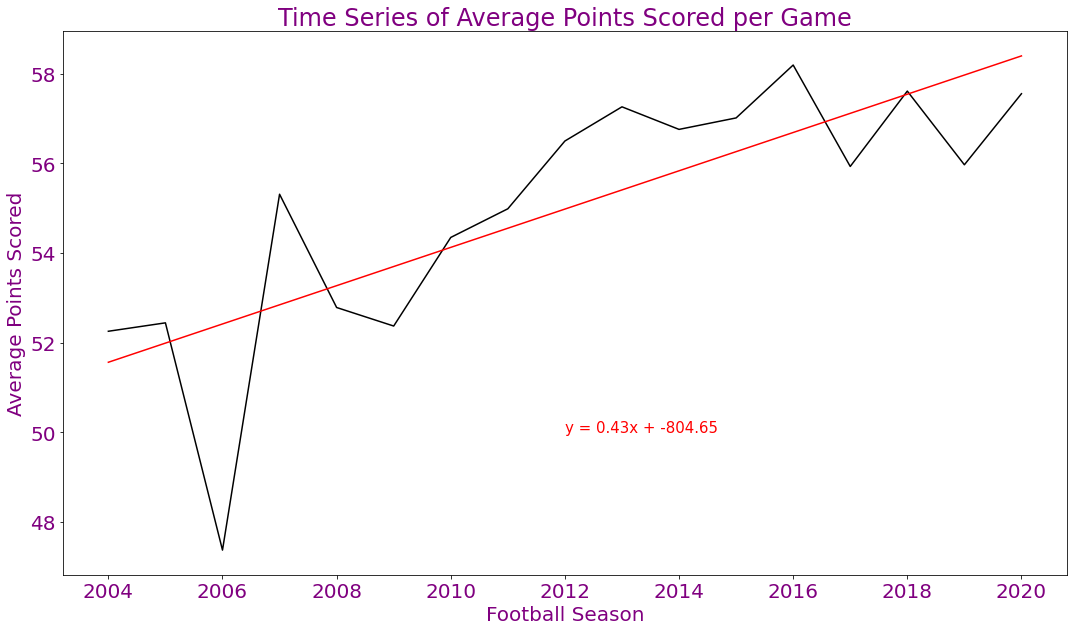

In [104]:
time_series_plot(score_df["Avg Points Scored Per Game"], "Average Points Scored", "Time Series of Average Points Scored per Game", 2012, 50, "Average_Points_Scored")

Correlation: -0.98


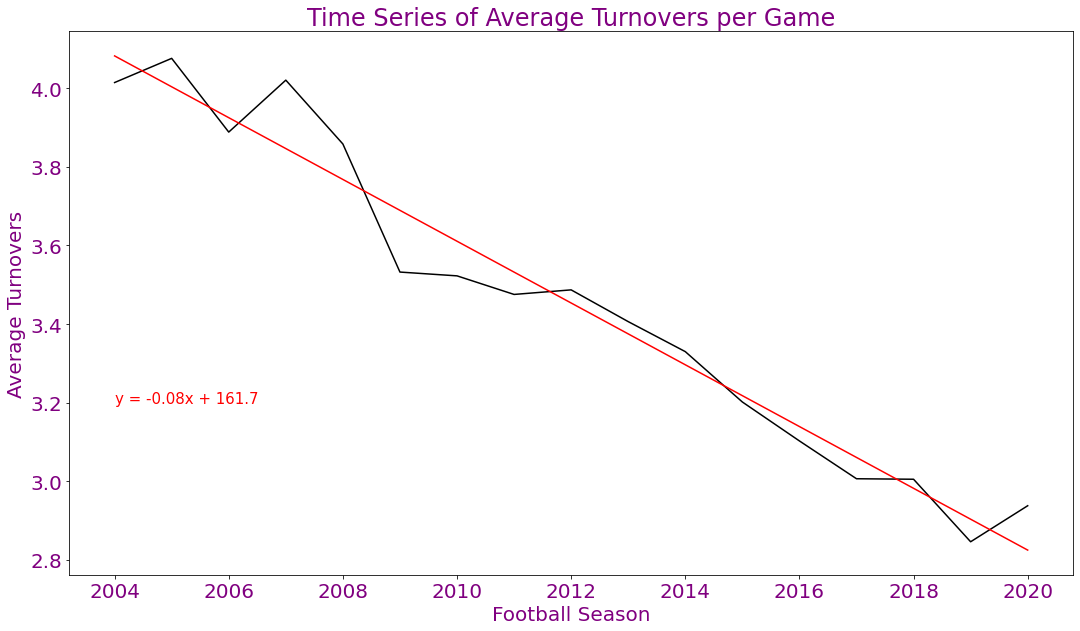

In [105]:
time_series_plot(score_df["Avg Turnovers"], "Average Turnovers", "Time Series of Average Turnovers per Game", 2004, 3.2, "Average_Turnovers")

Correlation: 0.76


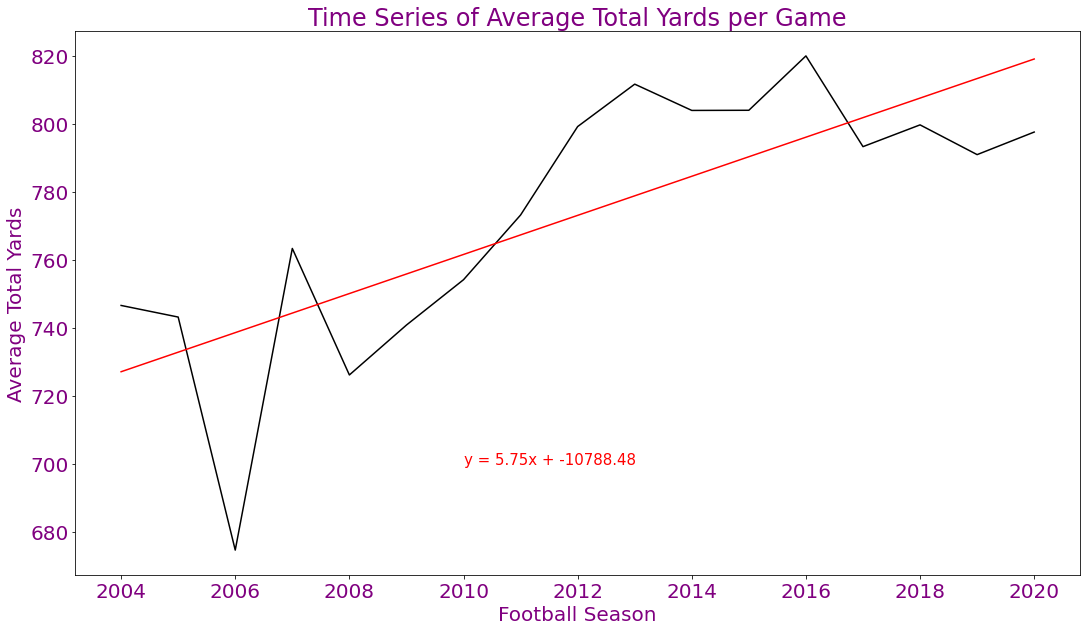

In [107]:
time_series_plot(score_df["Avg Total Yards"], "Average Total Yards", "Time Series of Average Total Yards per Game", 2010, 700, "Average_Total_Yards")

Correlation: 0.57


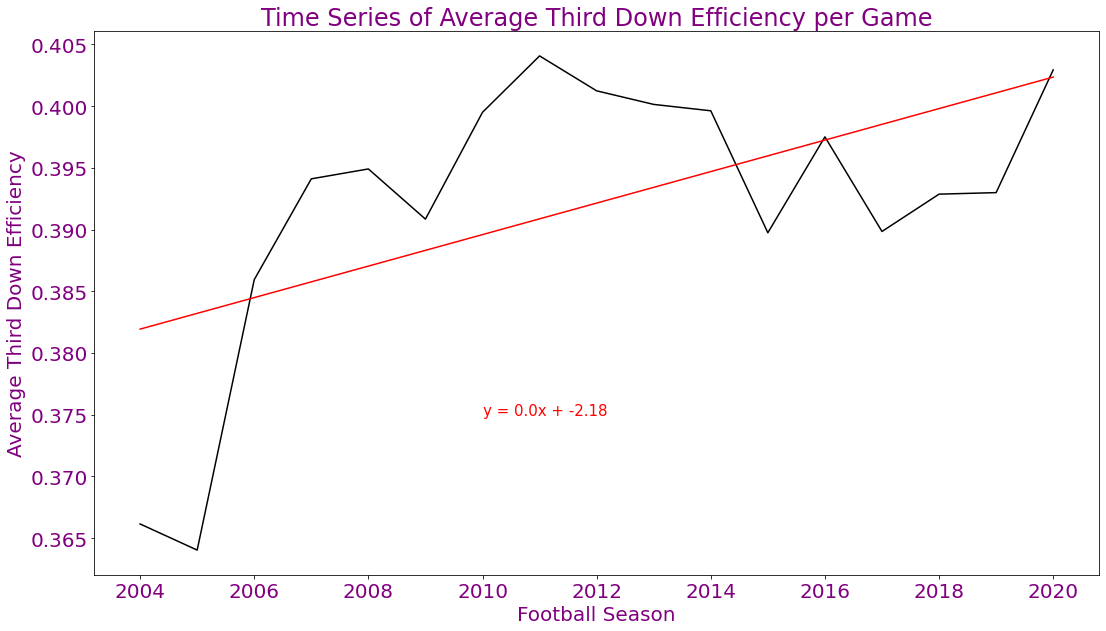

In [108]:
time_series_plot(score_df["Avg Third Down Eff"], "Average Third Down Efficiency", "Time Series of Average Third Down Efficiency per Game", 2010, .375, "Average_Third_Down_Efficiency")

Correlation: 0.4


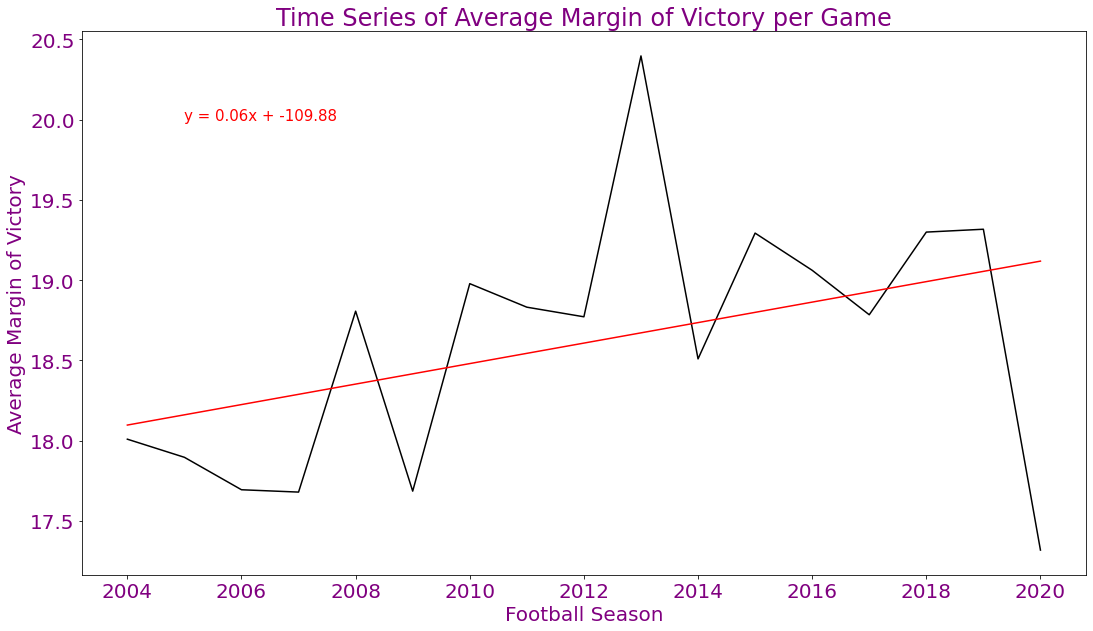

In [109]:
time_series_plot(score_df["Avg Margin of Victory"], "Average Margin of Victory", "Time Series of Average Margin of Victory per Game", 2005, 20, "Average_Margin_of_Victory")

Correlation: 0.64


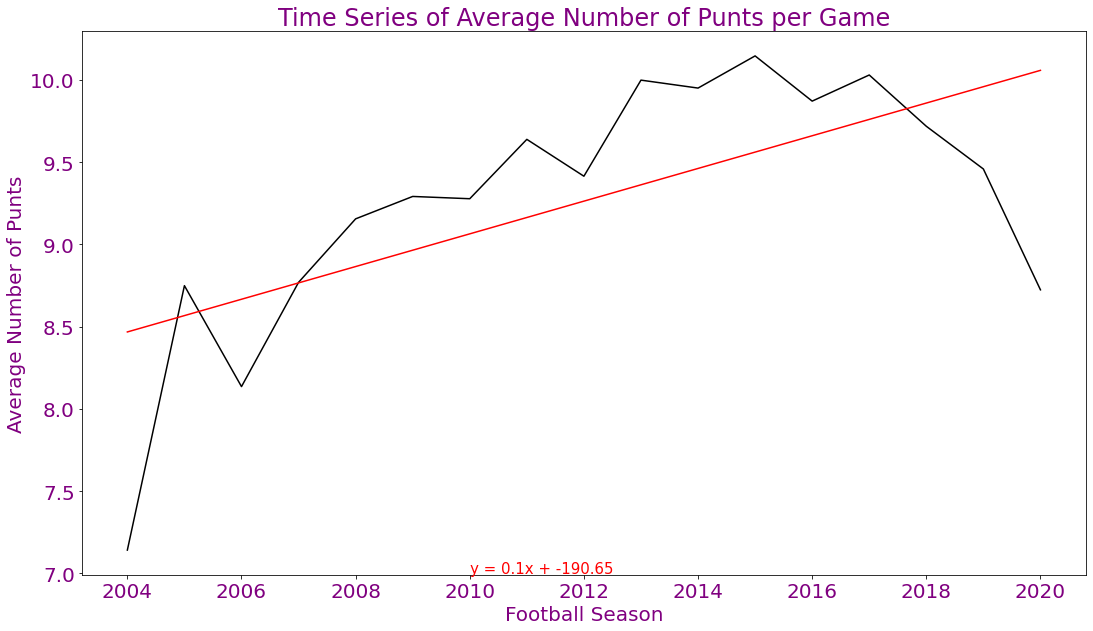

In [110]:
time_series_plot(score_df["Avg Number of Punts"], "Average Number of Punts", "Time Series of Average Number of Punts per Game", 2010, 7, "Average_Number_of_Punts")

Correlation: 0.95


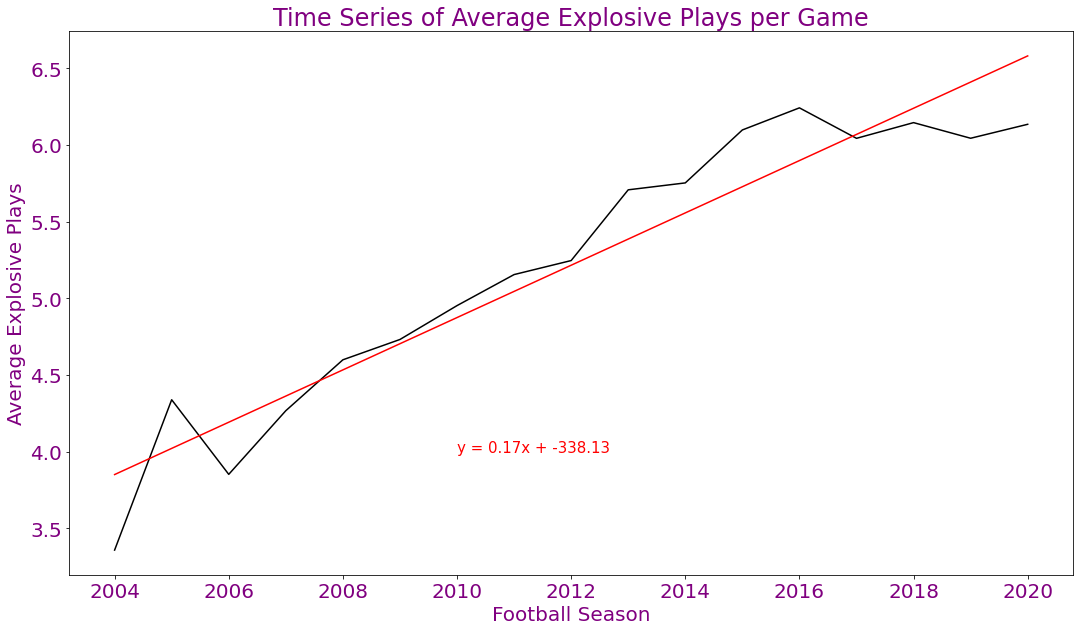

In [111]:
time_series_plot(score_df["Avg Explosive Plays"], "Average Explosive Plays", "Time Series of Average Explosive Plays per Game", 2010, 4, "Average_Explosive_Plays")

Correlation: 0.48


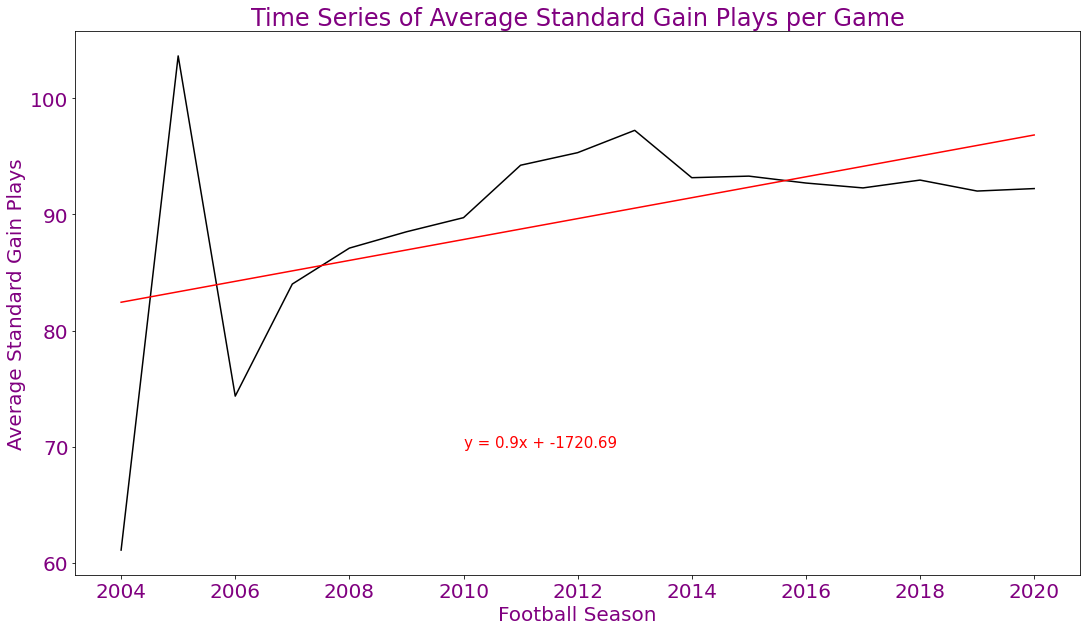

In [112]:
time_series_plot(score_df["Avg Standard Gain Plays"], "Average Standard Gain Plays", "Time Series of Average Standard Gain Plays per Game", 2010, 70, "Average_Standard_Gain_Plays")

Correlation: 0.63


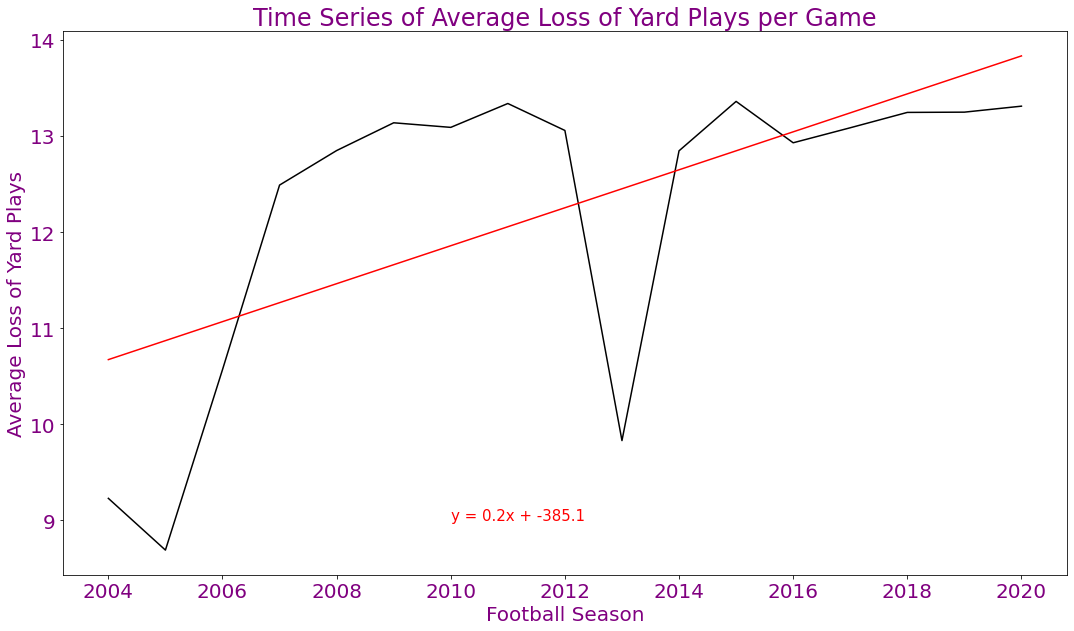

In [113]:
time_series_plot(score_df["Avg Loss of Yard Plays"], "Average Loss of Yard Plays", "Time Series of Average Loss of Yard Plays per Game", 2010, 9, "Average_Loss_of_Yard_Plays")

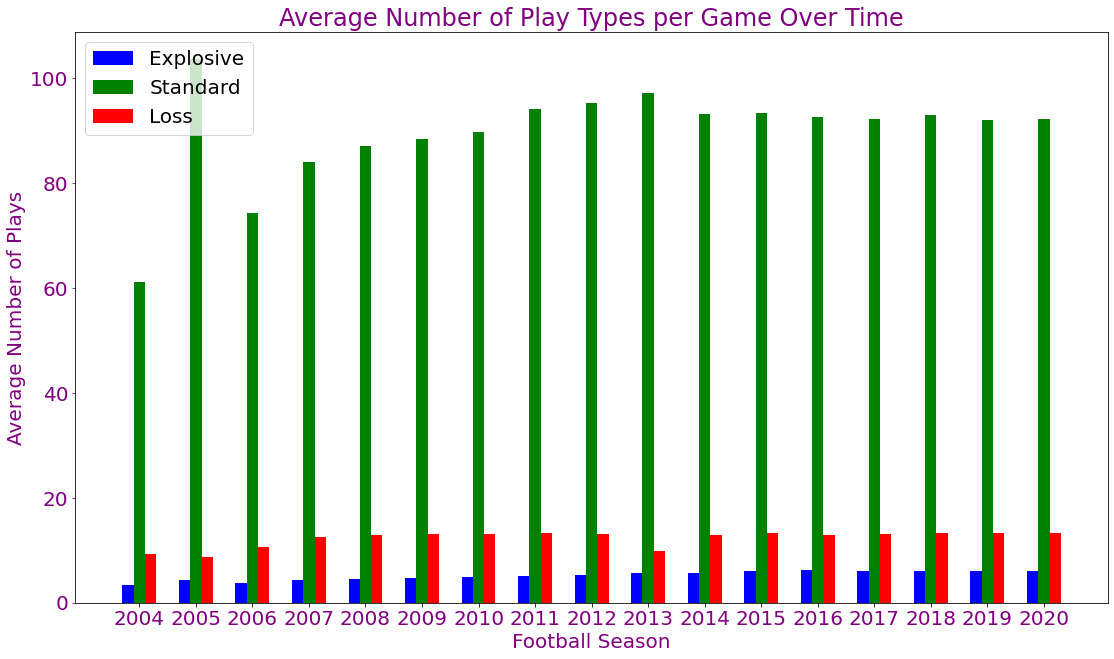

In [119]:
labels = [x for x in range(2004,2021)]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

rects1 = ax.bar(x - width, score_df["Avg Explosive Plays"], width, color="blue",
                label='Explosive')
rects2 = ax.bar(x, score_df["Avg Standard Gain Plays"], width, color="green",
                label='Standard')
rects3 = ax.bar(x + width, score_df["Avg Loss of Yard Plays"], width, color="red",
                label='Loss')
ax.set_ylabel('Average Number of Plays', color="purple")
ax.set_xlabel('Football Season', color="purple")
ax.set_title('Average Number of Play Types per Game Over Time', color="purple")
ax.set_xticks(x)
ax.set_xticklabels(labels, color="purple")
ax.tick_params(axis='y', colors='purple')
ax.legend()

fig.savefig('Output/Play_Type_Bar.png')
plt.show()

In [28]:
corr_matrix = score_df.corr()
corr_matrix

,Season,Avg Points Scored Per Game,Avg Turnovers,Avg Total Yards,Avg Third Down Eff,Avg Margin of Victory,Avg Number of Punts,Number of Punts,Avg Loss of Yard Plays,Avg Standard Gain Plays,Avg Explosive Plays,Num Loss of Yard Plays,Num Standard Gain Plays,Num Explosive Plays,Number of Games
Season,1.000000,0.773413,-0.978937,0.760679,0.565979,0.403174,0.643202,0.478576,0.630242,0.475721,0.951885,0.541345,0.461916,0.789844,0.253071
Avg Points Scored Per Game,0.773413,1.000000,-0.708560,0.974344,0.529106,0.510001,0.668223,0.500347,0.486019,0.551000,0.835954,0.457531,0.526397,0.721831,0.263938
Avg Turnovers,-0.978937,-0.708560,1.000000,-0.719644,-0.535351,-0.427674,-0.642197,-0.513307,-0.636637,-0.422616,-0.930199,-0.581448,-0.468550,-0.805436,-0.310425
Avg Total Yards,0.760679,0.974344,-0.719644,1.000000,0.446182,0.543571,0.668542,0.533458,0.389809,0.532419,0.830490,0.424500,0.550807,0.748577,0.312690
Avg Third Down Eff,0.565979,0.529106,-0.535351,0.446182,1.000000,0.337635,0.607253,0.456646,0.741077,0.375957,0.587047,0.607642,0.410085,0.508951,0.280710
Avg Margin of Victory,0.403174,0.510001,-0.427674,0.543571,0.337635,1.000000,0.661576,0.755633,0.123483,0.385363,0.532748,0.468171,0.713652,0.730219,0.704263
Avg Number of Punts,0.643202,0.668223,-0.642197,0.668542,0.607253,0.661576,1.000000,0.896854,0.569787,0.770417,0.821609,0.744170,0.914984,0.898037,0.678448
Number of Punts,0.478576,0.500347,-0.513307,0.533458,0.456646,0.755633,0.896854,1.000000,0.471232,0.519891,0.642054,0.833764,0.931218,0.905889,0.932375
Avg Loss of Yard Plays,0.630242,0.486019,-0.636637,0.389809,0.741077,0.123483,0.569787,0.471232,1.000000,0.282350,0.609150,0.838734,0.381834,0.562216,0.330045
Avg Standard Gain Plays,0.475721,0.551000,-0.422616,0.532419,0.375957,0.385363,0.770417,0.519891,0.282350,1.000000,0.654146,0.317336,0.768258,0.570330,0.251288


In [20]:
teams_df = pd.read_csv("Output/teams_points_against.csv")

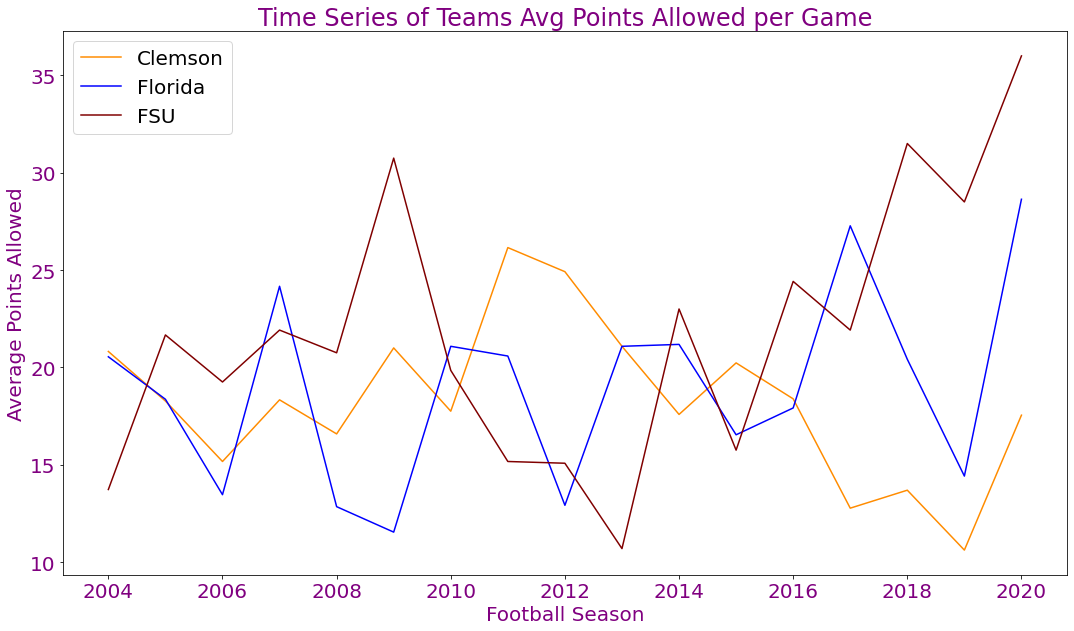

Clemson's Correlation Stat: -0.36
Florida's Correlation Stat: 0.32
FSU's Correlation Stat: 0.49


In [121]:
x_axis = teams_df["Season"]
plt.plot(x_axis,teams_df["Clemson Points Allowed"], color="darkorange")
plt.plot(x_axis,teams_df["Florida Points Allowed"], color="blue")
plt.plot(x_axis,teams_df["FSU Points Allowed"], color="maroon")
plt.xlabel("Football Season", color="purple")
plt.ylabel("Average Points Allowed", color="purple")
plt.title("Time Series of Teams Avg Points Allowed per Game", color="purple")
plt.xticks(color="purple")
plt.yticks(color="purple")
plt.legend(["Clemson","Florida","FSU"])
plt.savefig("Output/Teams_Points.png")
plt.show()
print(f"Clemson's Correlation Stat: {round(linear_regression(teams_df['Clemson Points Allowed']),2)}")
print(f"Florida's Correlation Stat: {round(linear_regression(teams_df['Florida Points Allowed']),2)}")
print(f"FSU's Correlation Stat: {round(linear_regression(teams_df['FSU Points Allowed']),2)}")

Correlation: 0.96


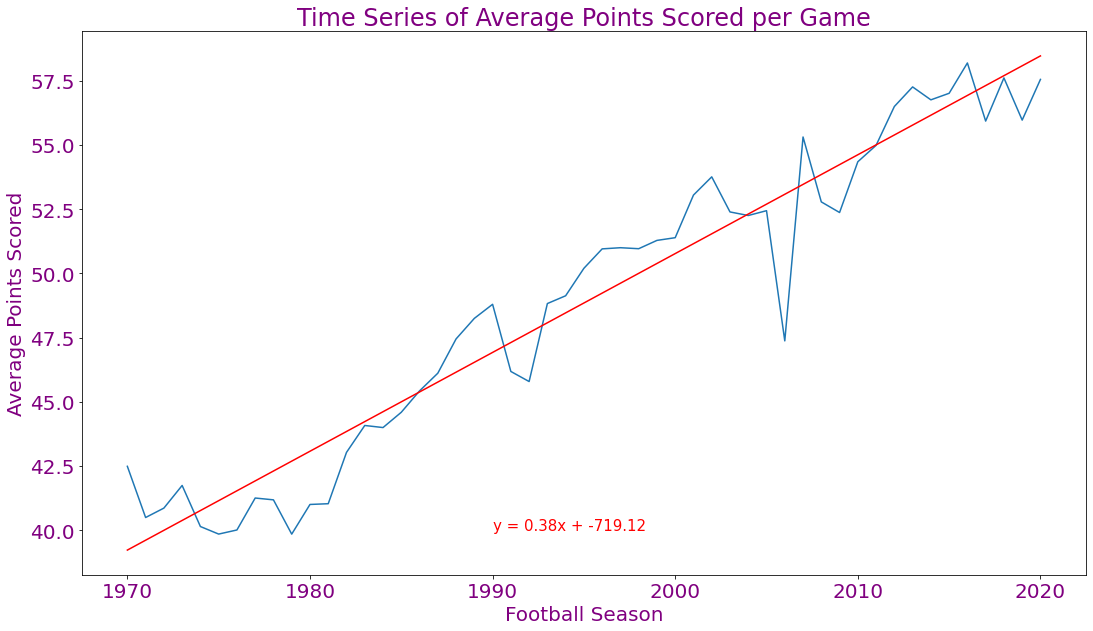

In [123]:
extended_score_df = pd.read_csv("Output/avg_points_by_season.csv")

plt.plot(extended_score_df["Season"], extended_score_df["Avg Points Scored Per Game"])
plt.xlabel("Football Season", color="purple")
plt.ylabel("Average Points Scored", color="purple")
plt.title("Time Series of Average Points Scored per Game", color="purple")
plt.xticks(color="purple")
plt.yticks(color="purple")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(extended_score_df["Season"],extended_score_df["Avg Points Scored Per Game"])
regress_values = extended_score_df["Season"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(extended_score_df["Season"], regress_values, "r-")
plt.annotate(line_eq,(1990,40),size=15, color="red")
    
plt.savefig("Output/Average_Points_Extended.png")
    
print(f'Correlation: {round(rvalue,2)}')